In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 4 - Exploring Data
md=pd.read_csv(r'E:\Django\mcdonalds.csv')
print("Columns list: ", list(md.columns))
print("Dimensions:", md.shape, '\n')
print(md.head(3), '\n')
MDx=md[1:11]
MDx=(MDx=="Yes")+0
print(MDx.mean(), '\n')

Columns list:  ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Dimensions: (1453, 15) 

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female   

yummy             0.6
convenient        0.9
spicy             0.2
fattening         1.0
greasy            0.7
fast              0.9
cheap             0.6
tasty             0.7
expensive         0.5
healthy           0.3
disgusting        0.3
Like              0.

In [2]:
pca=PCA().fit(MDx)
MDpca=pca.transform(MDx)
print('Variance:', list((pca.explained_variance_ratio_*100).round(4)))

Variance: [32.4141, 28.9705, 17.4432, 10.9978, 4.5759, 2.4348, 1.6455, 1.3894, 0.1288, 0.0]


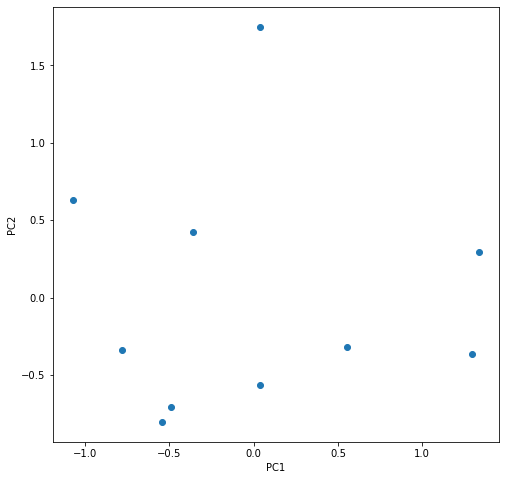

In [3]:
plt.figure(figsize = (8,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(MDpca[:, 0], MDpca[:, 1])
plt.show()

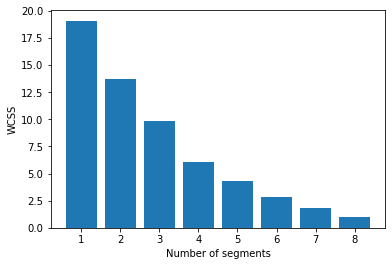

In [4]:
# Step 5 - Extracting Segments
# 5.1
MDkm28=[]
for i in range(1, 9):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(MDx)
    MDkm28.append(km.inertia_)
plt.bar(range(1, 9), MDkm28)
plt.xlabel('Number of segments')
plt.ylabel('WCSS')
plt.show()

MDk4=MDkm28[:4]